In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('../data/osstate/extracted/states_2022-01-03-04.csv.gz', compression='gzip')
df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1641182400,abbcc1,39.860184,-75.782020,152.671171,235.988651,0.00000,SWA1225,False,False,False,3466.0,5486.40,5463.54,1.641182e+09,1.641182e+09
1,1641182410,71c265,35.069687,126.695961,225.660378,184.969741,0.00000,AAR8947,False,False,False,7426.0,6705.60,6682.74,1.641182e+09,1.641182e+09
2,1641182410,a8f338,39.838334,-95.256226,222.504613,244.382879,0.00000,NKS1167,False,False,False,6731.0,10363.20,10363.20,1.641182e+09,1.641182e+09
3,1641182410,7c7ab4,-36.043762,147.352409,217.562984,224.041966,0.00000,VOZ846,False,False,False,3730.0,10972.80,11391.90,1.641182e+09,1.641182e+09
4,1641182410,a02a44,34.958221,-112.938220,207.175356,303.966285,-0.32512,N11EF,False,True,False,3664.0,13708.38,13929.36,1.641182e+09,1.641182e+09


In [4]:
# add an ident column by concatenating df['callsign'] and df['icao24']
df['ident'] = (df['callsign'].str.strip()+'_'+df['icao24'].str.strip())
# add a column rtime that is df['time'] - df['time'].min()
df['rtime'] = df['time'] - df['time'].min()
df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
0,1641182400,abbcc1,39.860184,-75.782020,152.671171,235.988651,0.00000,SWA1225,False,False,False,3466.0,5486.40,5463.54,1.641182e+09,1.641182e+09,SWA1225_abbcc1,0
1,1641182410,71c265,35.069687,126.695961,225.660378,184.969741,0.00000,AAR8947,False,False,False,7426.0,6705.60,6682.74,1.641182e+09,1.641182e+09,AAR8947_71c265,10
2,1641182410,a8f338,39.838334,-95.256226,222.504613,244.382879,0.00000,NKS1167,False,False,False,6731.0,10363.20,10363.20,1.641182e+09,1.641182e+09,NKS1167_a8f338,10
3,1641182410,7c7ab4,-36.043762,147.352409,217.562984,224.041966,0.00000,VOZ846,False,False,False,3730.0,10972.80,11391.90,1.641182e+09,1.641182e+09,VOZ846_7c7ab4,10
4,1641182410,a02a44,34.958221,-112.938220,207.175356,303.966285,-0.32512,N11EF,False,True,False,3664.0,13708.38,13929.36,1.641182e+09,1.641182e+09,N11EF_a02a44,10


In [5]:
# Drop the columns we don't need
df.drop(columns=['onground', 'alert', 'spi', 'squawk'], inplace=True)

In [6]:
idents = df['ident'].unique()
print('Number of unique idents:', len(idents))

Number of unique idents: 7244


## One aircraft

In [7]:
# Get the first ident
ident = 'AAR8947_71c265' # idents[6]
df_ident = df[df['ident'] == ident]
df_ident.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
1,1641182410,71c265,35.069687,126.695961,225.660378,184.969741,0.0,AAR8947,6705.6,6682.74,1.641182e+09,1.641182e+09,AAR8947_71c265,10
4436,1641182420,71c265,35.069687,126.695961,225.660378,184.969741,0.0,AAR8947,6705.6,6682.74,1.641182e+09,1.641182e+09,AAR8947_71c265,20
9742,1641182430,71c265,35.069687,126.695961,225.660378,184.969741,0.0,AAR8947,6705.6,6682.74,1.641182e+09,1.641182e+09,AAR8947_71c265,30
10977,1641182440,71c265,34.985779,126.687049,225.660378,184.969741,0.0,AAR8947,6705.6,6682.74,1.641182e+09,1.641182e+09,AAR8947_71c265,40
14834,1641182450,71c265,34.985779,126.687049,225.660378,184.969741,0.0,AAR8947,6705.6,6682.74,1.641182e+09,1.641182e+09,AAR8947_71c265,50


In [8]:
import matplotlib.pyplot as plt
from geo.drift_compensation import get_track_drift_rate

Text(0.5, 1.0, 'Heading of AAR8947_71c265')

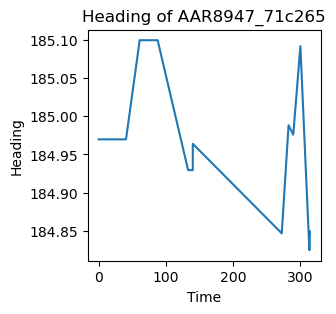

In [9]:
# Plot the heading (actually flight track) of the aircraft with time
rlastposupdate = df_ident['lastposupdate'].values - df_ident['lastposupdate'].min()
hdg = df_ident['heading'].values
vel = df_ident['velocity'].values / 1000 # km/s
lat = df_ident['lat'].values
lon = df_ident['lon'].values
alt = df_ident['geoaltitude'].values
plt.figure(figsize=(3,3))
plt.plot(rlastposupdate, hdg)
plt.xlabel('Time')
plt.ylabel('Heading')
plt.title(f'Heading of {ident}')

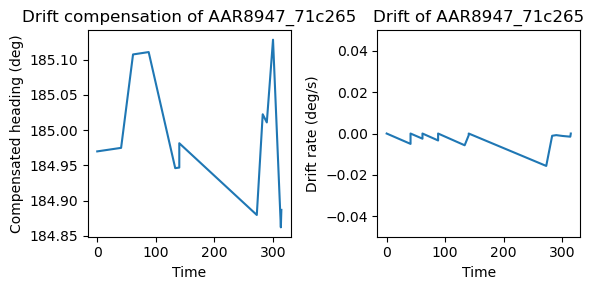

In [10]:
# Compute the drift compensation
track_drift = np.zeros_like(hdg)
cumul_drift = 0
hdg_compensated = np.zeros_like(hdg)
for i in range(1, len(hdg)):
    # We will use the last time's value to compensate the drift for this time
    track_drift[i] = get_track_drift_rate(lat[i-1], lon[i-1], hdg[i-1]) * vel[i-1] * (rlastposupdate[i] - rlastposupdate[i-1])
    if np.abs(track_drift[i]) > 1:
        print(f'lat: {lat[i-1]}, lon: {lon[i-1]}, hdg: {hdg[i-1]}, vel: {vel[i-1]}, time: {rlastposupdate[i]}')
        print(f'drift: {track_drift[i]}')
        print(f'x: {get_track_drift_rate(lat[i-1], lon[i-1], hdg[i-1])}')
    cumul_drift += track_drift[i]
    hdg_compensated[i] = (hdg[i] - cumul_drift) % 360


# Plot the drift compensation
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
plt.xlabel('Time')
plt.ylabel('Compensated heading (deg)')
plt.title(f'Drift compensation of {ident}')

plt.subplot(1,2,2)
plt.plot(rlastposupdate[1:], track_drift[1:])
plt.xlabel('Time')
plt.ylabel('Drift rate (deg/s)')
plt.title(f'Drift of {ident}')
plt.ylim(-0.05, 0.05)

plt.tight_layout() 

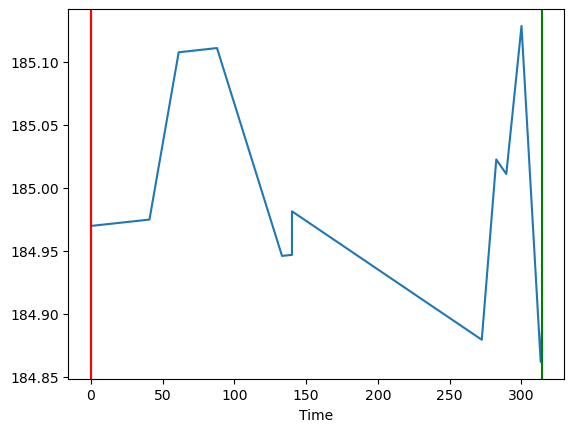

In [11]:
# Get changepoints in the heading
from changepy import pelt
from changepy.costs import normal_mean

# Get the changepoints
changepoints = pelt(normal_mean(hdg_compensated, 1), len(hdg_compensated))

# Write down the turning points
tp_lat = []
tp_lon = []
tp_time = []

# One final changepoint at the end of the flight or when the aircraft lands
landed_at = np.where(alt < 500)[0]
if len(landed_at) > 0:
    changepoints = np.append(changepoints, landed_at[0])
else:
    changepoints = np.append(changepoints, len(hdg_compensated)-1)

for i in range(len(changepoints)-1):
    tp_lat.append(lat[changepoints[i]])
    tp_lon.append(lon[changepoints[i]])
    tp_time.append(rlastposupdate[changepoints[i]])
    
    # if i == 0:
    #     tp_from_hdg.append(np.mean(hdg_compensated[:changepoints[i]]))
    # else:
    #     tp_from_hdg.append(np.mean(hdg_compensated[changepoints[i-1]:changepoints[i]]))
    # tp_to_hdg.append(np.mean(hdg_compensated[changepoints[i]:changepoints[i+1]]))

# Plot the changepoints 
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
for i, cp in enumerate(changepoints):
    if i == len(changepoints)-1:
        plt.axvline(x=rlastposupdate[cp], color='g')
    else:
        plt.axvline(x=rlastposupdate[cp], color='r')
    plt.xlabel('Time')

0 0.0 0.0
Merging 0 and 1
0 0.0 40.69600009918213
Merging 0 and 1
0 20.348000049591064 60.39900016784668
Merging 0 and 1
0 40.37350010871887 100.39200019836426
1 100.39200019836426 150.34899997711182
Merging 1 and 2
1 125.37050008773804 170.70800018310547
Merging 1 and 2
1 148.03925013542175 190.37199997901917
Merging 1 and 2
1 169.20562505722046 210.43700003623962
Merging 1 and 2
1 189.82131254673004 230.46399998664856
Merging 1 and 2
1 210.1426562666893 250.47699999809265
Merging 1 and 2


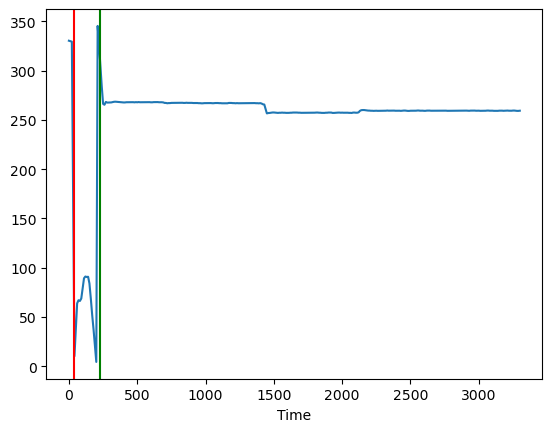

In [12]:
# Merge changepoints that are too close to each other
i = 0
while i < len(tp_lat)-1:
    print(i, tp_time[i], tp_time[i+1])
    if (tp_time[i+1] - tp_time[i]) < 60:
        print(f'Merging {i} and {i+1}')
        tp_lat[i] = (tp_lat[i] + tp_lat[i+1]) / 2
        tp_lon[i] = (tp_lon[i] + tp_lon[i+1]) / 2
        tp_time[i] = (tp_time[i] + tp_time[i+1]) / 2
        # tp_from_hdg[i] = (tp_from_hdg[i] + tp_from_hdg[i+1]) / 2
        # tp_to_hdg[i] = (tp_to_hdg[i] + tp_to_hdg[i+1]) / 2
        tp_lat.pop(i+1)
        tp_lon.pop(i+1)
        tp_time.pop(i+1)
        # tp_from_hdg.pop(i+1)
        # tp_to_hdg.pop(i+1)
    else:
        i += 1

# Plot the changepoints 
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
for i, cp in enumerate(tp_time):
    if i == len(tp_time)-1:
        plt.axvline(x=tp_time[i], color='g')
    else:
        plt.axvline(x=tp_time[i], color='r')
    plt.xlabel('Time')

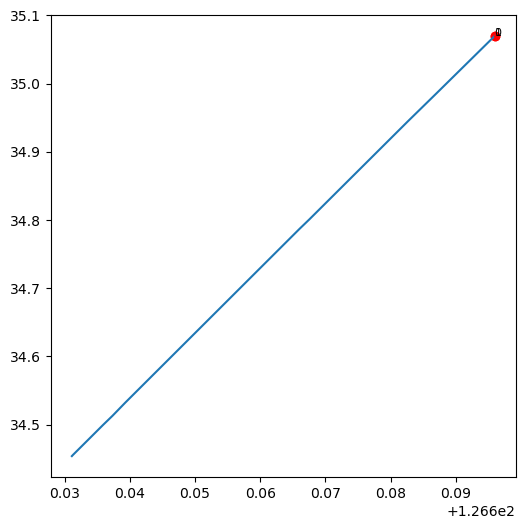

In [12]:
# Reconstruct the approximate flight path
plt.figure(figsize=(6,6))
plt.plot(lon, lat)
plt.plot(tp_lon, tp_lat, 'ro', markersize=1)
for i in range(len(tp_lat)):
   plt.scatter(tp_lon[i], tp_lat[i], color='r')
   plt.text(tp_lon[i], tp_lat[i], f'{i}', fontsize=8)

We actually do not care about the heading because we only rely on the the flight track to derive changepoints. Afterwards, everything is connected through great circle path.

## Altitude changepoint

Text(0.5, 1.0, 'Altitude of ANA1445_872968')

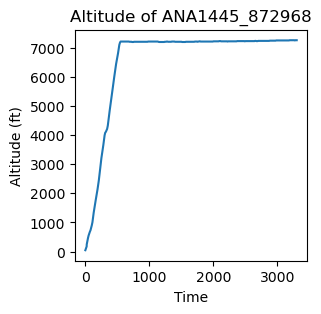

In [14]:
plt.figure(figsize=(3,3))
plt.plot(rlastposupdate, alt)
plt.xlabel('Time')
plt.ylabel('Altitude (ft)')
plt.title(f'Altitude of {ident}')

Text(0.5, 1.0, 'Altitude of ANA1445_872968')

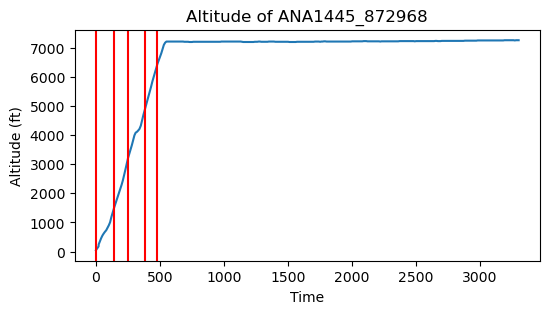

In [15]:
# Detect changepoints in altitude
from changepy.costs import normal_mean
from changepy import pelt

# Get the changepoints
changepoints = pelt(normal_mean(alt, 1000), len(alt))

# Plot the changepoints
plt.figure(figsize=(6,3))
plt.plot(rlastposupdate, alt)
for cp in changepoints:
    plt.axvline(x=rlastposupdate[cp], color='r')
plt.xlabel('Time')
plt.ylabel('Altitude (ft)')
plt.title(f'Altitude of {ident}')


0 0.0 140.61600017547607
1 140.61600017547607 250.47699999809265
Merging 1 and 2
1 195.54650008678436 380.6170001029968


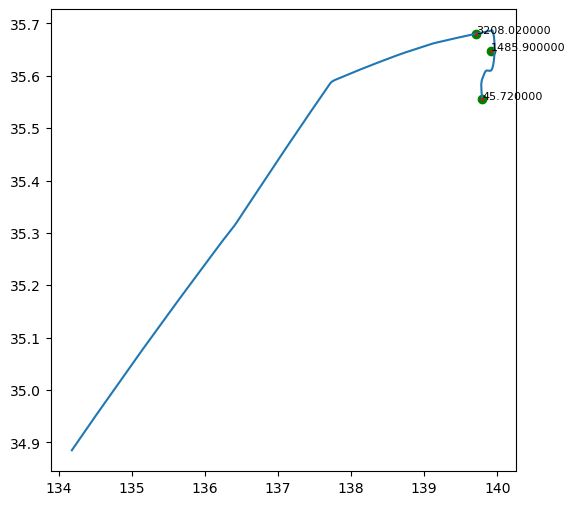

In [16]:
dp_time = []
dp_lat = []
dp_lon = []
dp_alt = []

for i in range(len(changepoints)-1):
    dp_time.append(rlastposupdate[changepoints[i]])
    dp_lat.append(lat[changepoints[i]])
    dp_lon.append(lon[changepoints[i]])
    dp_alt.append(alt[changepoints[i]])

# Merge changepoints that are too close to each other
i = 0
while i < len(dp_lat)-1:
    print(i, dp_time[i], dp_time[i+1])
    if (dp_time[i+1] - dp_time[i]) < 120:
        print(f'Merging {i} and {i+1}')
        dp_lat[i] = (dp_lat[i] + dp_lat[i+1]) / 2
        dp_lon[i] = (dp_lon[i] + dp_lon[i+1]) / 2
        dp_time[i] = (dp_time[i] + dp_time[i+1]) / 2
        dp_alt[i] = (dp_alt[i] + dp_alt[i+1]) / 2
        dp_lat.pop(i+1)
        dp_lon.pop(i+1)
        dp_time.pop(i+1)
        dp_alt.pop(i+1)
    else:
        i += 1

# Plot the changepoints
plt.figure(figsize=(6,6))
plt.plot(lon, lat)
plt.plot(dp_lon, dp_lat, 'ro', markersize=1)
for i in range(len(dp_lat)):
   plt.scatter(dp_lon[i], dp_lat[i], color='g')
   plt.text(dp_lon[i], dp_lat[i], f'{alt[changepoints[i]]:2f}', fontsize=8)

# Test the library functions

In [17]:
df_ident = df[df['ident'] == idents[6]]
df.dropna(how='any', inplace=True)

In [18]:
df_ident.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
6,1641182410,4ca9bb,53.002842,-14.946507,264.558798,85.985824,0.32512,EIN1TC,11285.22,11033.76,1.641182e+09,1.641182e+09,EIN1TC_4ca9bb,10
4956,1641182420,4ca9bb,53.004089,-14.906693,264.222966,87.210015,0.00000,EIN1TC,11285.22,11033.76,1.641182e+09,1.641182e+09,EIN1TC_4ca9bb,20
9555,1641182430,4ca9bb,53.005280,-14.866638,264.248506,87.098603,0.00000,EIN1TC,11285.22,11033.76,1.641182e+09,1.641182e+09,EIN1TC_4ca9bb,30
11729,1641182440,4ca9bb,53.006566,-14.828012,263.817497,86.758195,0.00000,EIN1TC,11285.22,11033.76,1.641182e+09,1.641182e+09,EIN1TC_4ca9bb,40
15732,1641182450,4ca9bb,53.007963,-14.787990,263.847089,86.646660,0.00000,EIN1TC,11277.60,11026.14,1.641182e+09,1.641182e+09,EIN1TC_4ca9bb,50


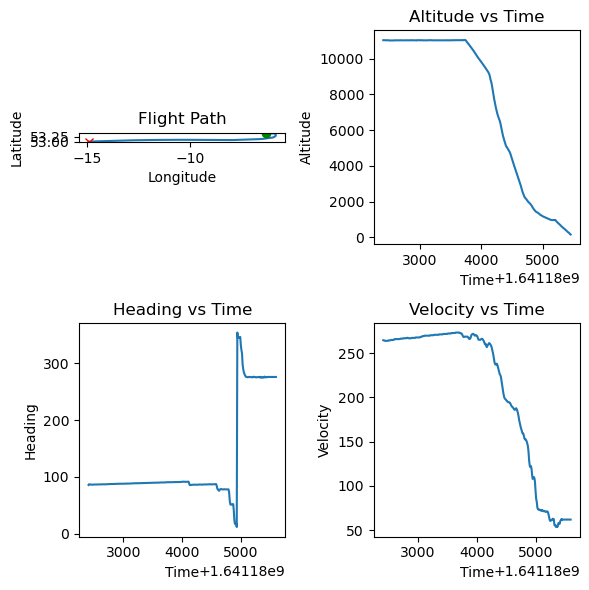

<Figure size 640x480 with 0 Axes>

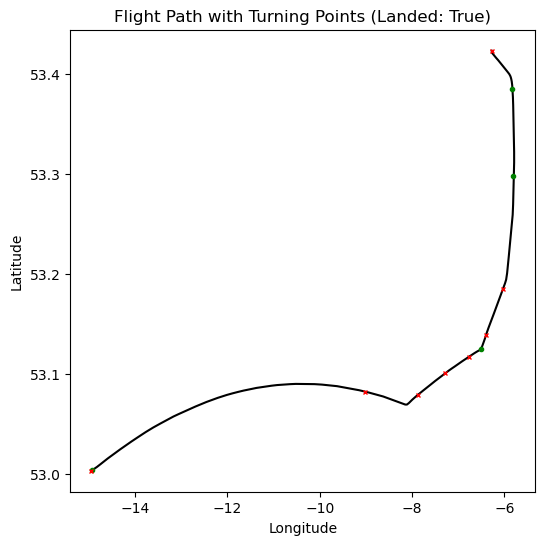

In [19]:
from get_turn import get_turning_points, plot_changepoints, TurnAndRise
from potters import plot_df
plot_df(df_ident)

turns:TurnAndRise = get_turning_points(df_ident)
plt.figure()
plot_changepoints(turns, df_ident)
